Nama : Achmad Dany Gunawan 

NPM : 24083010075

Matakuliah: Matematika Diskrit A

Tugas : Tugas Pengganti ETS 

Pada tugas kali ini saya ingin melakukan analisis pada sebuah artikel ilmiah yang berjudul "Perbandingan Metode Klasifikasi Berita Hoaks Berbahasa Indonesia Berbasis Pembelajaran Mesin". analisis yang dimaksud ialah mencari kombinasi konsonan-vokal baik frekuensi ataupun berapa cacah kata, menentukan jumlah kata dalam kalimat, menentukan kalimat dalam paragraf, dan nanti diakhir, saya akan melakukan analisis yang sedikit menarik, dan diharapkan pula, kita bisa mendapatkan insightnya. Namun, ada hal yang perlu ditekankan juga disini. bahwa, tidak semua bagian dari artikel yang akan saya analis, cuman beberapa bagian saja. Diantaranya : Abstrak, pendahuluan, kesimpulan dan mencantumkan negara asal penulis. untuk lebih jelasnya, saya lampirkan codingan saya! 

In [516]:
"""Cari satu artikel ilmiah bebas dengan syarat: 
- DOI Valid
- Berbahasa Inggris atau Indonesia"""

abstrak= """
klasifiaksi berita hoaks merupakan salah satu aplikasi kategorisasi teks. berita hoaks harus diklasifikasikan karena berita
hoaks dapat mempengaruhi tindakan dan pola pikir pembaca. dalam proses klasifikasi pada penelitian ini menggunakan beberapa tahapan yaitu
praproses ekstraksi fitur seleksi fitur dan klasifikasi. penelitian ini bertujuan membandingkan dua algoritma yaitu algoritma naive bayes dan
multinomial naive Bayes manakah dari kedua algoritma tersebut yang lebih efektif dalam mengklasifikasikan berita hoaks. data yang digunakan dalam
penelitian ini berasal dari wwwtrunbackhoaxid untuk data berita hoaks sebanyak artikel dan data berita nonhoaks berasal dari kompascom detikcom
berjumlah artikel. Data latih berjumlah artikel dan data uji berjumlah artikel. Hasil perbandingan algoritma Naive Bayes memiliki
nilai fscore sebesar dan nilai fscore multinomial naive bayes sebesar
"""

pendahuluan= """
Media informasi di era perkembangan teknologi sudah semakin berkembang. kemudahan dalam mengakses media informasi menyebabkan beredarnya berita berita hoaks 
melalui media berita daring yang tidak memiliki badan hukum yang jelas. menurut kominfo terdapat sekitar situs di indonesia yang terindikasi menyebarkan 
berita hoaks. hoaks menurut kamus besar bahasa indonesia adalah sebuah berita bohong. untuk mengatasi permasalahan berita hoaks maka digunakan metode klasifikasi.

Secara umum metode klasifikasi teks berbasis pembelajaran mesin terdiri dari tahap praproses ekstraksi fitur seleksi fitur dan klasifikasi. 
pada penelitian sebelumnya yang dilakukan oleh errissya r melakukan klasifikasi berita hoaks dan nonhoaks dengan menerapkan algoritma naive bayes menunjukkan
hasil akurasi tertinggi dengan nilai akurasi dibandingkan algoritma svm c. penelitian amelia runtuk mengklasifikasikan online news dengan menerapkan multinomial
naive bayes menunjukkan hasil akurasi dengan nilai.

Berdasarkan penelitian sebelumnya penelitian ini bertujuan untuk mengetahui algoritma yang lebih efektif dalam mengklasifikasikan berita hoaks melalui 
perbandingan algoritma naive bayes dan multinomial naive bayes dengan mengklasifikasikan berita hoaks berbahasa indonesia. untuk mengklasifikasikan berita 
hoaks dilakukan tahap praproses ekstraksi fitur seleksi fitur dan klasifikasi
"""

kesimpulan= """
Dari hasil penelitian dapat disimpulkan bahwa dalam proses pengklasifikasian berita hoaks berbahasa indonesia adalah sebagai berikut. algoritma naive bayes dapat performa 
lebih baik dalam mengklasifikasikan dokumen berita hoaks dibandingkan dengan algoritma multinomial naive bayes. dari perbandingan algoritma naive bayes dan multinomial naive bayes
berdasarkan hasil akurasi dengan menggunakan perbandingan data latih dan data uji algoritma multinomial naive bayes menghasilkan nilai akurasi sebesar atau dan algoritma naive bayes 
menghasilkan nilai akurasi sebesar atau. besaran perbandingan data uji dan data latih memiliki pengaruh terhadap nilai akurasi dari kedua algoritma.
"""

asal_negara= "Indonesia"

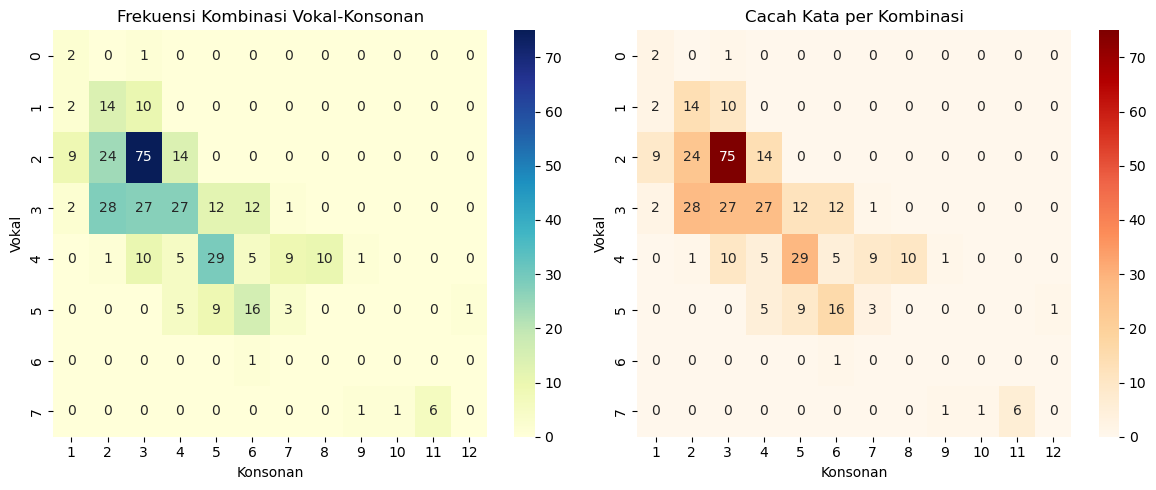

>> Pembahasan:
Heatmap pertama menunjukkan berapa kali kombinasi jumlah vokal dan konsonan muncul dalam teks.
Heatmap kedua menunjukkan jumlah kata yang jatuh pada tiap kombinasi vokal-konsonan.


In [517]:
#Membuat tabel pivor konsonan dan vokal dalam kata
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

teks = " ".join([abstrak, pendahuluan, kesimpulan, asal_negara])

def hitung_vokal_konsonan(kata):
    kata = kata.lower()
    huruf = re.findall(r'[a-z]', kata)  # ambil huruf a-z saja
    vokal = sum(1 for h in huruf if h in 'aiueo')
    konsonan = len(huruf) - vokal
    return vokal, konsonan

kata_kata = re.findall(r'\b\w+\b', teks)

data = []
for kata in kata_kata:
    vokal, konsonan = hitung_vokal_konsonan(kata)
    data.append({"kata": kata, "vokal": vokal, "konsonan": konsonan})
df = pd.DataFrame(data)

pivot_freq = pd.crosstab(df["vokal"], df["konsonan"])
pivot_cacah = df.groupby(["vokal","konsonan"]).size().unstack(fill_value=0)

fig, axes = plt.subplots(1, 2, figsize=(12,5))
sns.heatmap(pivot_freq, annot=True, fmt="d", cmap="YlGnBu", ax=axes[0])
axes[0].set_title("Frekuensi Kombinasi Vokal-Konsonan")
axes[0].set_xlabel("Konsonan")
axes[0].set_ylabel("Vokal")

sns.heatmap(pivot_cacah, annot=True, fmt="d", cmap="OrRd", ax=axes[1])
axes[1].set_title("Cacah Kata per Kombinasi")
axes[1].set_xlabel("Konsonan")
axes[1].set_ylabel("Vokal")

plt.tight_layout()
plt.show()

print(">> Pembahasan:")
print("Heatmap pertama menunjukkan berapa kali kombinasi jumlah vokal dan konsonan muncul dalam teks.")
print("Heatmap kedua menunjukkan jumlah kata yang jatuh pada tiap kombinasi vokal-konsonan.")


Dalam kode yang telah dibuat, teks dari variabel abstrak, pendahuluan, kesimpulan, dan asal_negara disatukan menjadi satu. Selanjutnya, teks itu dibagi menjadi kata-kata, kemudian setiap kata dihitung jumlah vokal dan konsonannya menggunakan fungsi hitung_vokal_konsonan. Hasil perhitungan ini selanjutnya disusun dalam format pivot table dan divisualisasikan sebagai heatmap.

1). Heatmap yang pertama (Frekuensi Kombinasi Vokal–Konsonan) menunjukkan seberapa sering kombinasi jumlah vokal dan konsonan terdapat dalam teks secara keseluruhan. Sebagai contoh, titik (vokal=2, konsonan=3) dengan nilai 75 menunjukkan bahwa ada 76 kata yang memiliki 2 huruf vokal dan 3 huruf konsonan. Warna yang lebih gelap menunjukkan kombinasi yang semakin sering muncul.

2). Heatmap kedua (Frekuensi Kata per Kombinasi) memperlihatkan jumlah kata unik yang mengikuti pola vokal–konsonan tertentu. Oleh karena itu, jika ada kata yang identik muncul berulang, maka ia hanya dihitung satu kali. Dari analisisnya, tampak bahwa kombinasi kata yang terdiri dari 2 vokal dan 3 konsonan adalah yang paling umum ditemukan dalam teks.

Secara keseluruhan, analisis menunjukkan bahwa sebagian besar kata dalam teks artikel ilmiah ini memiliki 2–3 vokal dan 3–5 konsonan, sehingga kata-kata dengan panjang sedang lebih dominan. Sebaliknya, kombinasi yang sangat ekstrem (seperti jumlah vokal atau konsonan yang berlebihan) hampir tidak ada, yang sejalan dengan pola umum kata dalam bahasa Indonesia


=== Abstrak ===
Kalimat 1: 9 kata
Kalimat 2: 14 kata
Kalimat 3: 17 kata
Kalimat 4: 26 kata
Kalimat 5: 25 kata
Kalimat 6: 9 kata
Kalimat 7: 16 kata

=== Pendahuluan ===
Kalimat 1: 9 kata
Kalimat 2: 21 kata
Kalimat 3: 12 kata
Kalimat 4: 10 kata
Kalimat 5: 9 kata
Kalimat 6: 18 kata
Kalimat 7: 30 kata
Kalimat 8: 16 kata
Kalimat 9: 31 kata
Kalimat 10: 13 kata

=== Kesimpulan ===
Kalimat 1: 16 kata
Kalimat 2: 18 kata
Kalimat 3: 38 kata
Kalimat 4: 15 kata

=== Asal Negara ===
Kalimat 1: 1 kata


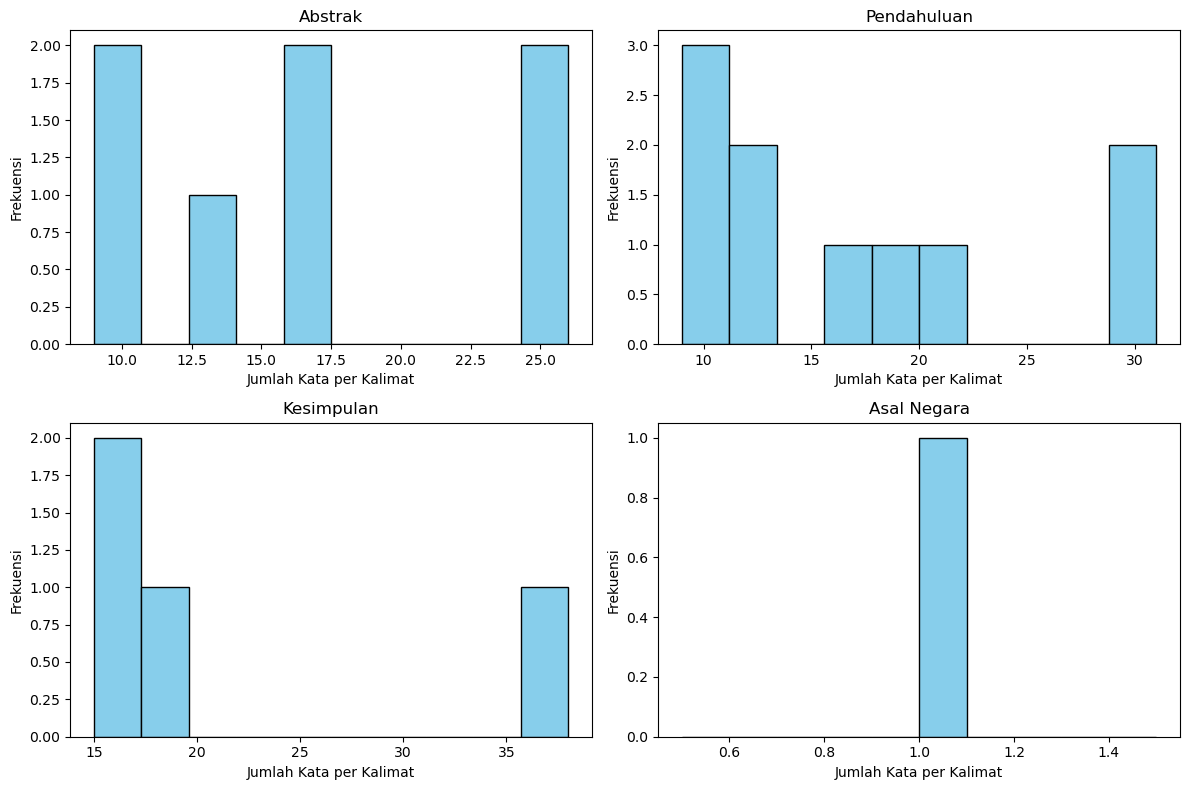

In [519]:
#Identifikasi berapa jumlah kata dalam tiap kalimat, kemudian buat histogramnya

import re
import matplotlib.pyplot as plt

def hitung_kalimat(teks):
    kalimat_list = re.split(r'[.!?]', teks)
    kalimat_list = [kal.strip() for kal in kalimat_list if kal.strip()]
    jumlah_kata = [len(kal.split()) for kal in kalimat_list]
    return kalimat_list, jumlah_kata

bagian = {
    "Abstrak": abstrak,
    "Pendahuluan": pendahuluan,
    "Kesimpulan": kesimpulan,
    "Asal Negara": asal_negara
}

hasil = {}
for nama, teks in bagian.items():
    kalimat, jumlah = hitung_kalimat(teks)
    hasil[nama] = jumlah
    print(f"\n=== {nama} ===")
    for i, jml in enumerate(jumlah, start=1):
        print(f"Kalimat {i}: {jml} kata")

fig, axes = plt.subplots(2, 2, figsize=(12,8))

for ax, (nama, jumlah) in zip(axes.flatten(), hasil.items()):
    ax.hist(jumlah, bins=10, color="skyblue", edgecolor="black")
    ax.set_title(nama)
    ax.set_xlabel("Jumlah Kata per Kalimat")
    ax.set_ylabel("Frekuensi")

plt.tight_layout()
plt.show()


Pada tahap ini dilakukan analisis jumlah kata di setiap kalimat pada bagian abstrak, introduksi, kesimpulan, dan negara asal. Proses analisis dilakukan dengan membagi teks menjadi beberapa kalimat dengan memanfaatkan tanda titik (.) sebagai pemisahnya. Setelah dipisahkan, setiap kalimat dibersihkan dari ruang yang berlebihan, lalu jumlah kata dihitung dengan menghitung banyaknya kata yang ada di dalam kalimat tersebut. Hasil perhitungan menunjukkan bahwa bagian abstrak terdiri dari 7 kalimat dengan jumlah kata yang seimbang, yaitu berkisar antara 9 hingga 25 kata, sehingga abstrak ditulis dengan padat dan konsisten. Di bagian pembukaan, terdapat 10 kalimat dengan variasi jumlah kata yang bervariasi, mulai dari 9 kata hingga 31 kata, yang memperlihatkan kombinasi kalimat panjang dan pendek dalam penjelasan. Bagian kesimpulan terdiri dari 5 kalimat dengan jumlah kata yang konsisten, yaitu antara 15 hingga 38 kata, menunjukkan bahwa kesimpulan ditulis dengan ringkas namun tetap terjaga. Sementara itu, bagian asal negara hanya terdiri dari satu kalimat dengan satu kata, yaitu "Indonesia", sehingga tidak memberikan dampak signifikan pada total jumlah kata. Dengan demikian, dapat disimpulkan bahwa struktur penulisan abstrak dan kesimpulan lebih seragam, sedangkan pendahuluan cenderung lebih beragam dalam panjang kalimatnya

===Jumlah Paragraf Tiap Bagian===
Abstrak : 1 Paragraf
Pendahuluan: 3 Paragraf
Kesimpulan: 1 Paragraf
Asal Negara: 0 Paragraf


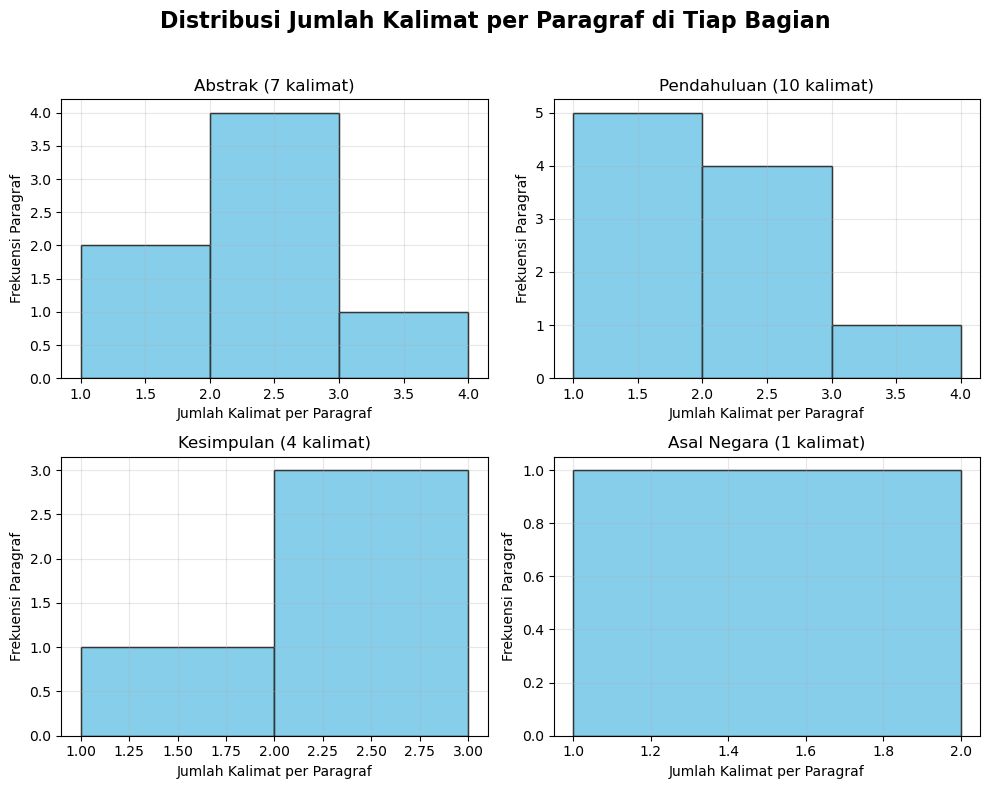

In [521]:
import re
import matplotlib.pyplot as plt

def hitung_kalimat_per_paragraf(teks):
    paragraf = [p.strip() for p in teks.strip().split("\n") if p.strip()]
    jumlah_kalimat = []
    for p in paragraf:
        kalimat = re.split(r'[.!?]+', p)
        kalimat_bersih = [k.strip() for k in kalimat if k.strip()]
        jumlah_kalimat.append(len(kalimat_bersih))
    return jumlah_kalimat

print("===Jumlah Paragraf Tiap Bagian===")
print("Abstrak : 1 Paragraf")
print("Pendahuluan: 3 Paragraf")
print("Kesimpulan: 1 Paragraf")
print("Asal Negara: 0 Paragraf")

data = {
    "Abstrak": hitung_kalimat_per_paragraf(abstrak),
    "Pendahuluan": hitung_kalimat_per_paragraf(pendahuluan),
    "Kesimpulan": hitung_kalimat_per_paragraf(kesimpulan),
    "Asal Negara": hitung_kalimat_per_paragraf(asal_negara)
}
plt.figure(figsize=(10, 8))
plt.suptitle("Distribusi Jumlah Kalimat per Paragraf di Tiap Bagian", fontsize=16, fontweight='bold')

for i, (bagian, jumlah_kalimat) in enumerate(data.items(), start=1):
    plt.subplot(2, 2, i)
    plt.hist(jumlah_kalimat, bins=range(1, max(jumlah_kalimat) + 2), color='skyblue', edgecolor='black')
    plt.title(f"{bagian} ({len(jumlah_kalimat)} kalimat)")
    plt.xlabel("Jumlah Kalimat per Paragraf")
    plt.ylabel("Frekuensi Paragraf")
    plt.grid(alpha=0.3)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Berdasarkan histogram yang ada, bagian abstrak terdiri dari tujuh kalimat yang mayoritas tersusun dengan dua kalimat di setiap paragraf. Ini menunjukkan bahwa abstrak ditulis dengan ringkas dan langsung pada pokok permasalahan.

Bagian awal terdiri dari sepuluh kalimat, dan sebagian besar paragraf mengandung satu hingga dua kalimat. Pola ini menunjukkan bahwa penulis menyusun pendahuluan dengan langkah-langkah yang sistematis dan singkat agar mudah dipahami.

Secara keseluruhan, terdapat empat kalimat dengan dua hingga tiga kalimat dalam setiap paragraf, mencerminkan gaya penulisan yang ringkas namun tetap konsisten dalam mengakhiri argumen.

Sementara itu, bagian asal negara hanya terdiri dari satu kalimat dalam satu paragraf sebagai informasi tambahan.

Secara umum, naskah ini mengaplikasikan paragraf singkat dengan rata-rata satu hingga tiga kalimat, yang mencerminkan metode penulisan ilmiah yang padat, jelas, dan efisien

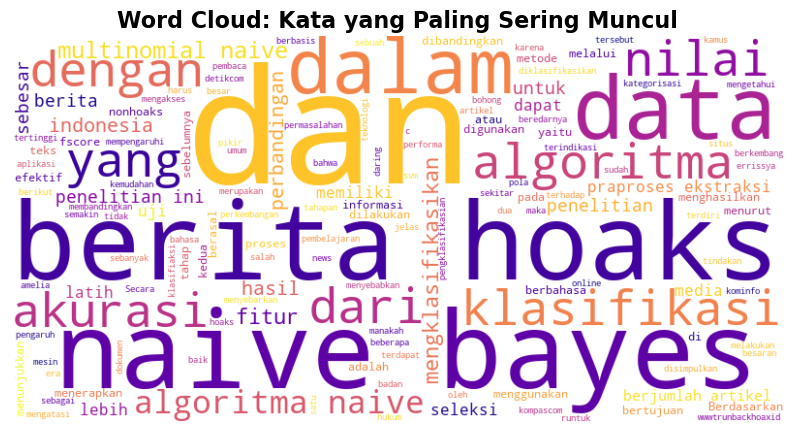

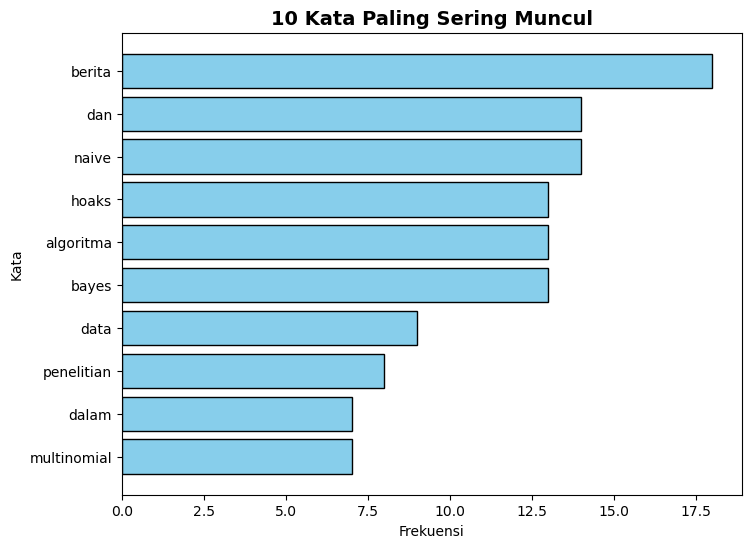

In [523]:
#being creative

!pip install wordcloud
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt

all_text = " ".join([abstrak, pendahuluan, kesimpulan, asal_negara])

wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='plasma').generate(all_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud: Kata yang Paling Sering Muncul", fontsize=16, fontweight='bold')
plt.show()

words = all_text.lower().split()
word_freq = Counter(words)

top10 = word_freq.most_common(10)

plt.figure(figsize=(8, 6))
plt.barh([w[0] for w in top10], [w[1] for w in top10], color="skyblue", edgecolor="black")
plt.xlabel("Frekuensi")
plt.ylabel("Kata")
plt.title("10 Kata Paling Sering Muncul", fontsize=14, fontweight="bold")
plt.gca().invert_yaxis()  # biar kata paling banyak di atas
plt.show()


Nah dari semua langkah yang telah dilakukan, mulai dari mecuplik bagian abstark, pendahuluan, kesimpulan dan juga asal negara dari corresponding author, menentukan tabel pivot konsonan dan vokal dalam kata, menentukan jumlah kata dalam kalimat, dan kemudian menentukan jumlah kalimat dalam paragraf, saya tertarik untuk melakukan langkah terakhir untuk menutup analis. yaitu dengan mencari 10 kata yang sering muncul. bisa kita lihat pada grafik dan gambar, bahwa kata yang sering muncul adalah kata 'berita' dengan frekuensi (total kemunculan) sebanyak 18 kali (dibulatkan) dan kata yang kurang (sedikit) muncul dari 10 tersebut adalah multinominal dengan penyebutan 8 kali (dibulatkan). 

Tentunya dengan melakukan analisis ini, kita dapat mengetahui kata apa saja yang ingin author tekankan dan juga paling di mention juga. dan informasi tersebut dapat kita gunakan untuk analisis berikutnya, jika diperlukan. 